In [1]:
import pandas as pd

pd.read_csv("data\서울특별시 공공자전거 대여정보_201906_2.csv", encoding='cp949')

FileNotFoundError: [Errno 2] No such file or directory: 'data\\서울특별시 공공자전거 대여정보_201906_2.csv'

#### # 데이터 전처리

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

# 데이터 불러와서 합치기
bikes=pd.DataFrame()
for i in range(3):
    bikes_temp = pd.read_csv(f"data\서울특별시 공공자전거 대여정보_201906_{i+1}.csv", encoding='cp949')
    bikes=pd.concat([bikes,bikes_temp])
    
bikes.isnull().sum()
bikes['대여일시']=bikes['대여일시'].astype('datetime64[ms]')

# 파생변수, '요일', '일자', '대여시간대', '주말구분'
요일 =['월','화','수','목','금','토','일']
bikes['요일']=bikes['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])
bikes['일자']=bikes['대여일시'].dt.day
bikes['대여시간대']=bikes['대여일시'].dt.hour
bikes['주말구분']=bikes['대여일시'].dt.dayofweek.apply(lambda x : '평일' if x < 5 else "주말")

# 위도, 경도 파일 Merge
bike_shop = pd.read_csv("data\공공자전거 대여소 정보_23_06.csv", encoding='cp949')
bike_gu=bike_shop[['자치구','대여소번호', '보관소(대여소)명','위도', '경도']]
bike_gu = bike_gu.rename(columns={'보관소(대여소)명':'대여소명'})
bikes = pd.merge(bikes,bike_gu,left_on='대여 대여소번호',right_on='대여소번호')
bikes = bikes.drop(['대여소번호','대여소명'],axis=1)
bikes = bikes.rename(columns={'자치구':'대여구','위도':'대여점 위도','경도':'대여점 경도'})

<Axes: xlabel='요일', ylabel='count'>

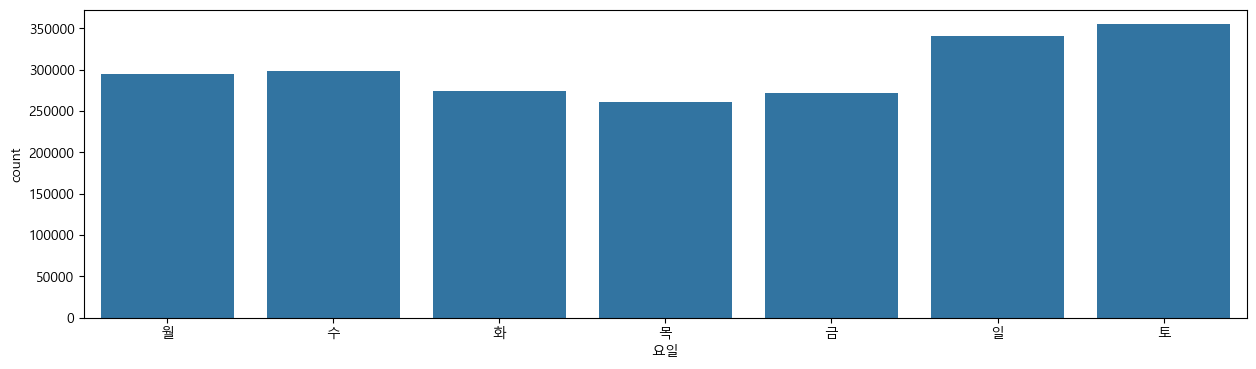

In [ ]:
# 시간 개념에 따른 데이터 분석
# 1. 요일별 따릉이 이용 건수
plt.figure(figsize=(15,4))
sns.countplot(data=bikes,x='요일')

<Axes: xlabel='일자', ylabel='count'>

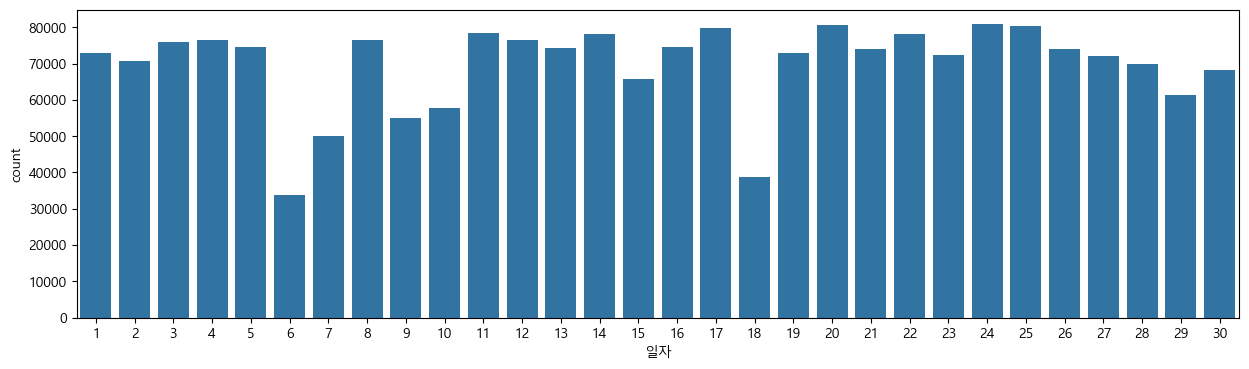

In [ ]:
# 2. 일자별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(data=bikes,x='일자')

<Axes: xlabel='대여시간대', ylabel='count'>

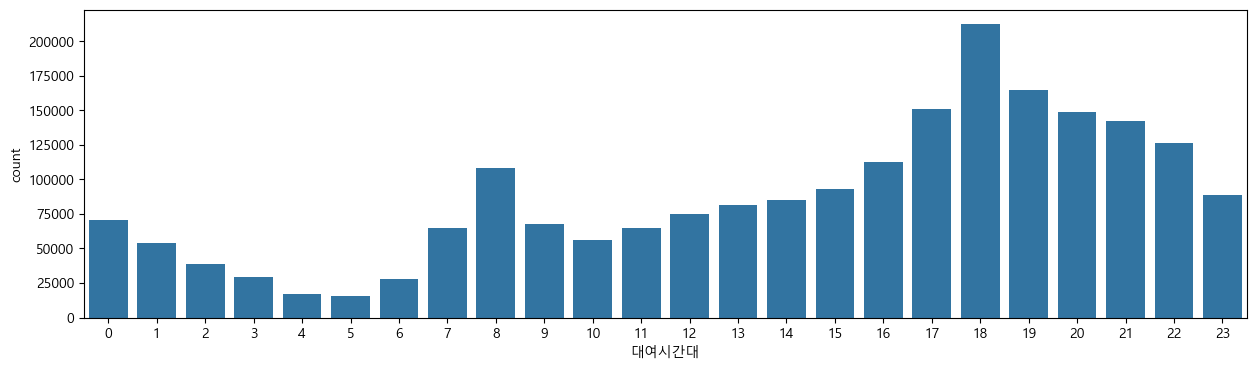

In [ ]:
# 3. 대여시간대별 따릉이 이용건수
plt.figure(figsize=(15,4))
sns.countplot(data=bikes,x='대여시간대')

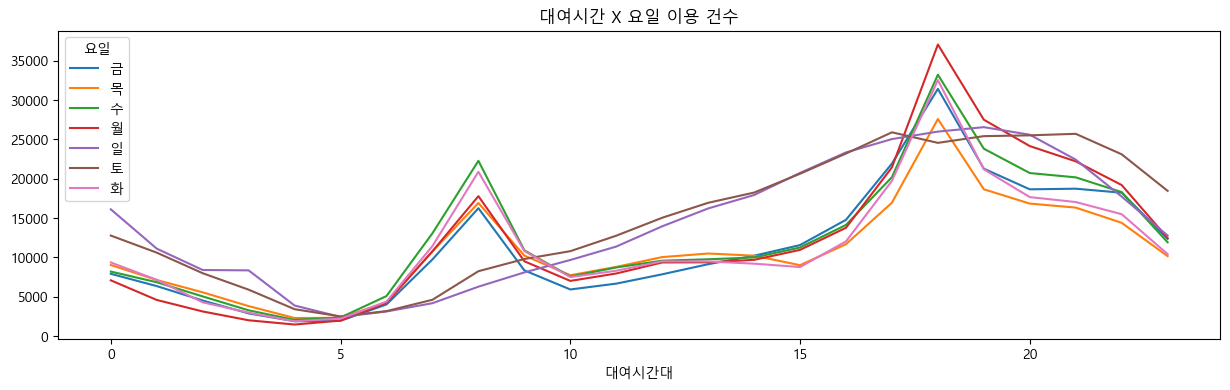

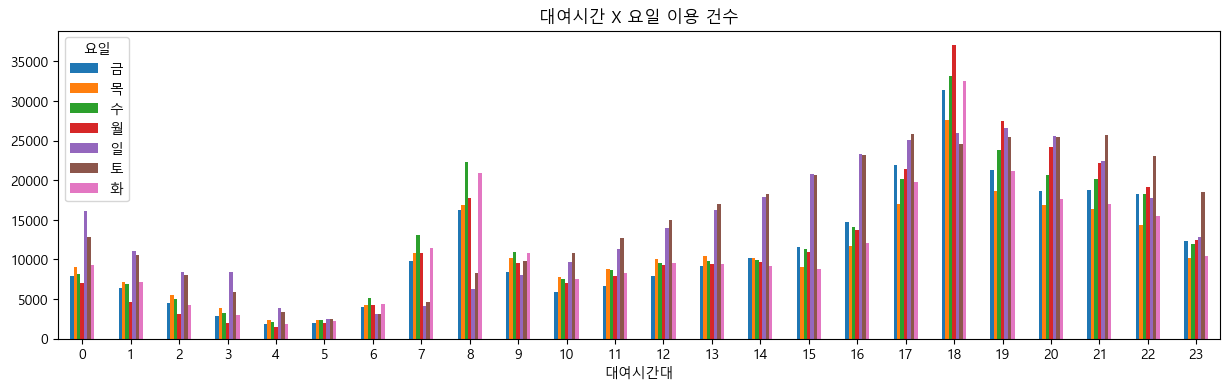

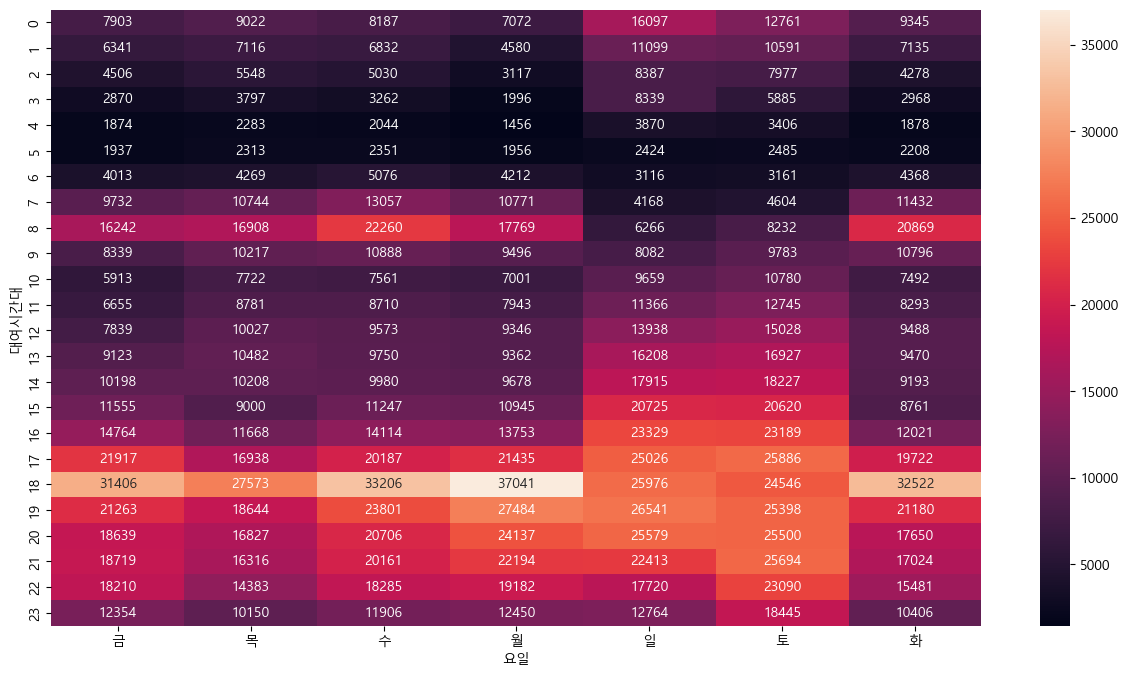

In [ ]:
# 4. 대여시간대 & 요일 따릉이 이용건수
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대',columns='요일',values='자전거번호',aggfunc='count')
hourly_dayofweek_ride.plot(kind='line',title='대여시간 X 요일 이용 건수',figsize=(15,4))
plt.show()
hourly_dayofweek_ride.plot(kind='bar',title='대여시간 X 요일 이용 건수',figsize=(15,4),rot=0)
plt.show()
plt.figure(figsize=(15,8))
sns.heatmap(data=hourly_dayofweek_ride,annot=True,fmt='d')
plt.show()

In [ ]:
# 5. 대여시간대 x 주말구분 따릉이 이용건수

hourly_week_ride = bikes.pivot_table(index='대여시간대',columns='주말구분',values='자전거번호',aggfunc='count')

In [ ]:
hourly_week_ride.head(3)

주말구분,주말,평일
대여시간대,,
0,28858,41529
1,21690,32004
2,16364,22479


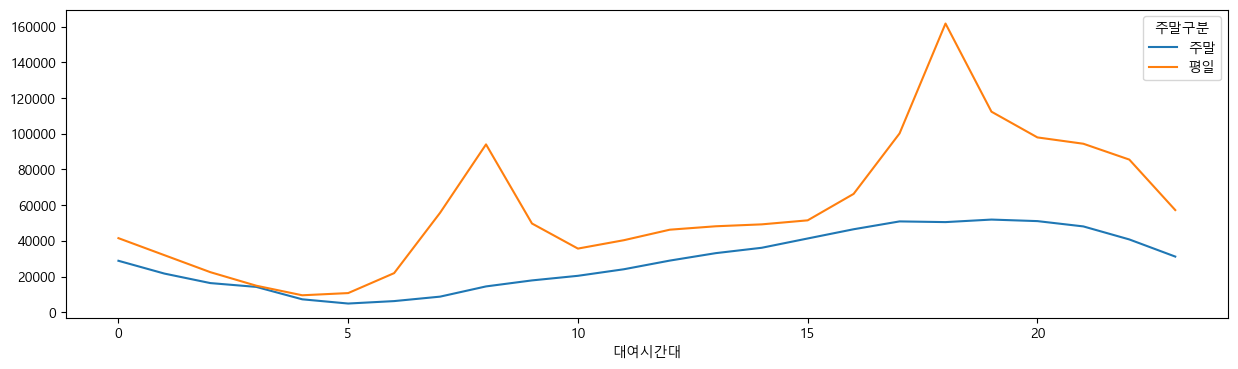

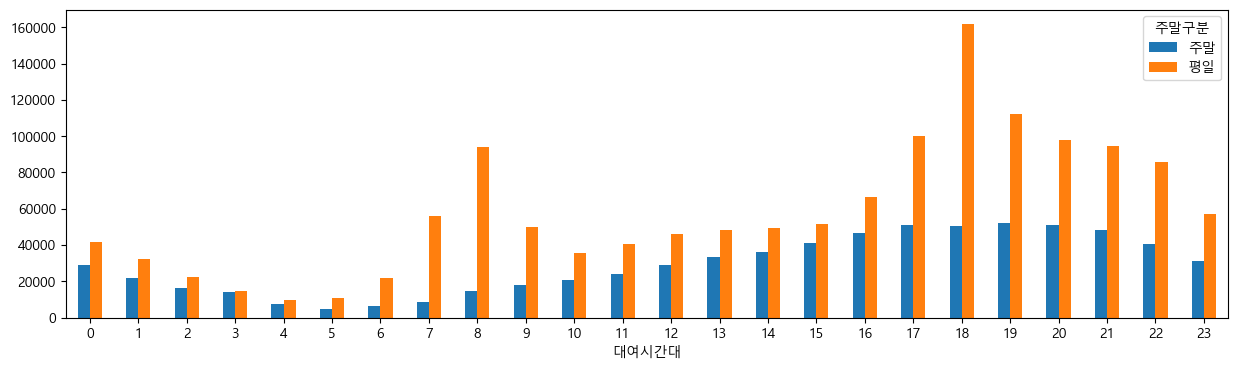

In [ ]:
# df.plot() 이용

hourly_week_ride.plot(kind='line',figsize=(15,4));
hourly_week_ride.plot(kind='bar',figsize=(15,4),rot=0);

<function matplotlib.pyplot.show(close=None, block=None)>

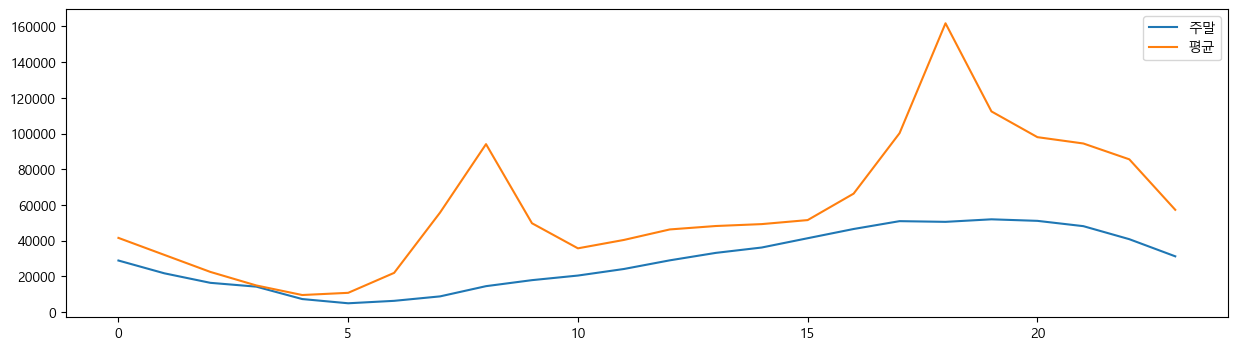

In [ ]:
# matplotlib 이용
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(hourly_week_ride.index, hourly_week_ride['주말'],label='주말')
plt.plot(hourly_week_ride.index, hourly_week_ride['평일'],label='평균')
plt.legend()
plt.show

In [ ]:
# seaborn 이용
import numpy as np

plt.figure(figsize=(15,4))
sns.lineplot(data=bikes,x='대여시간대',y='이용시간',hue='주말구분')

<Axes: xlabel='대여시간대', ylabel='count'>

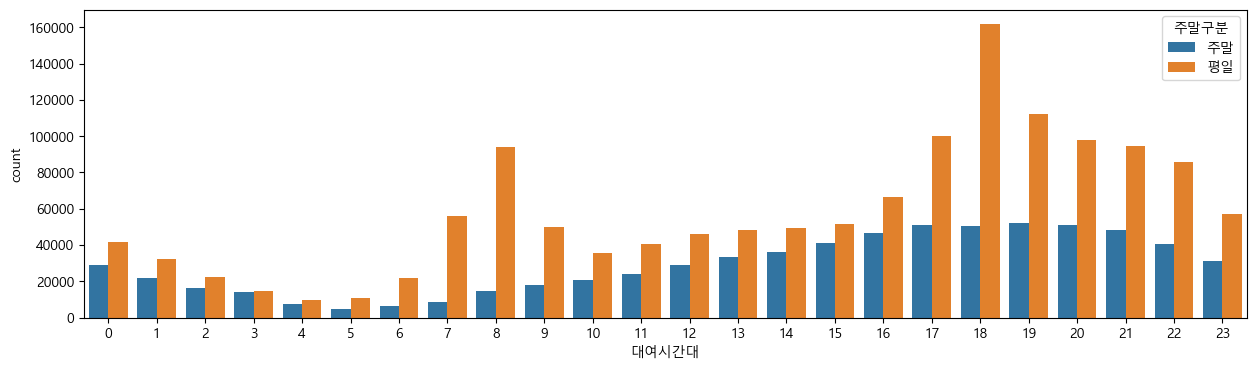

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=bikes,x='대여시간대',hue='주말구분')

In [ ]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '요일', '일자', '대여시간대', '주말구분', '대여구',
       '대여점 위도', '대여점 경도'],
      dtype='object')

In [ ]:
for i in range(3):
    print(f"data\서울특별시 공공자전거 대여정보_201906_{i+1}.csv")

In [ ]:
bikes=pd.DataFrame()
for i in range(3):
    bikes_temp = pd.read_csv(f"data\서울특별시 공공자전거 대여정보_201906_{i+1}.csv", encoding='cp949')
    bikes=pd.concat([bikes,bikes_temp])

bikes

In [ ]:
bikes.head(3)

In [ ]:
bikes.info()

In [ ]:
bikes.isnull().sum()

In [ ]:
bikes.describe()

In [ ]:
bikes['대여일시']=bikes['대여일시'].astype('datetime64[ms]')

In [ ]:
bikes.info()

In [ ]:
bikes['대여일시'].dt.dayofweek

### apply 함수 이해
- apply(사용자정의함수), apply(람다식)

In [ ]:
df = pd.DataFrame([[4,9],[1,4],[5,6]],columns=['A','B'])

# x 값을 입력받아서 1증가한 후 결과값을 반환
def plus_one(x):
    x+=1
    return x

df['B'] = df['B'].apply(plus_one)


In [ ]:
df['B'].apply(lambda x : x+1)

- '요일' 파생변수 생성 , 월,화,수,목.....일

In [ ]:
요일 =['월','화','수','목','금','토','일']

bikes['요일']=bikes['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])

In [ ]:
bikes.head(3)

In [ ]:
bike_shop = pd.read_csv("data\공공자전거 대여소 정보_23_06.csv", encoding='cp949')

In [ ]:
bike_shop.head()

In [ ]:
bike_shop.columns

In [ ]:
bike_gu=bike_shop[['자치구','대여소번호', '보관소(대여소)명','위도', '경도']]

In [ ]:
bike_gu.head()

In [ ]:
bike_gu = bike_gu.rename(columns={'보관소(대여소)명':'대여소명'})

In [ ]:
bike_gu.head(1)

In [ ]:
bikes.head(1)

In [ ]:
bikes = pd.merge(bikes,bike_gu,left_on='대여 대여소번호',right_on='대여소번호')
bikes.head(2)

In [ ]:
# 대여소번호, 대여소명 열 삭제

bikes = bikes.drop(['대여소번호','대여소명'],axis=1)

In [ ]:
bikes.head(1)

In [ ]:
bikes = bikes.rename(columns={'자치구':'대여구','위도':'대여점 위도','경도':'대여점 경도'})
bikes.head()

### 대여시간대별, 요일별 대연 건수 분석
- pivot_table

In [ ]:
bikes['대여시간대']=bikes['대여일시'].dt.hour

In [ ]:
bikes.head()

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대',columns='요일',values='자전거번호',aggfunc=['count'])
hourly_dayofweek_ride.plot(kind='line',title='대여시간 X 요일 이용 건수',figsize=(15,4))
hourly_dayofweek_ride

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

<Axes: title={'center': '대여시간 X 요일 이용 건수'}, xlabel='대여시간대'>

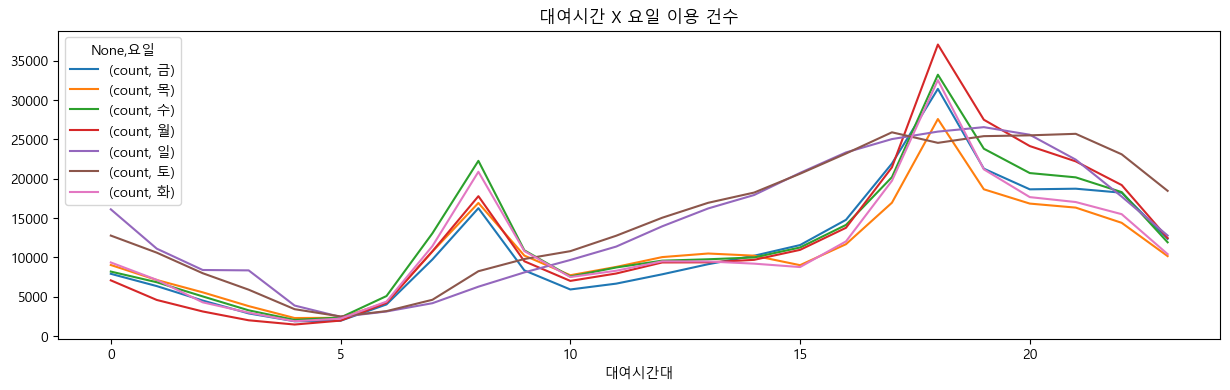

In [ ]:
hourly_dayofweek_ride.plot(kind='line',title='대여시간 X 요일 이용 건수',figsize=(15,4))

<Axes: title={'center': '대여시간 X 요일 이용 건수'}, xlabel='대여시간대'>

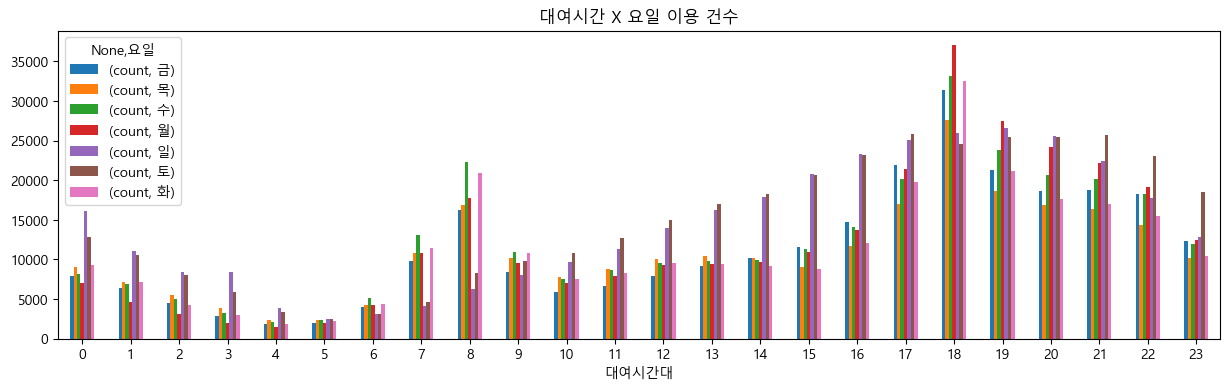

In [ ]:
hourly_dayofweek_ride.plot(kind='bar',title='대여시간 X 요일 이용 건수',figsize=(15,4),rot=0)

<Axes: xlabel='None-요일', ylabel='대여시간대'>

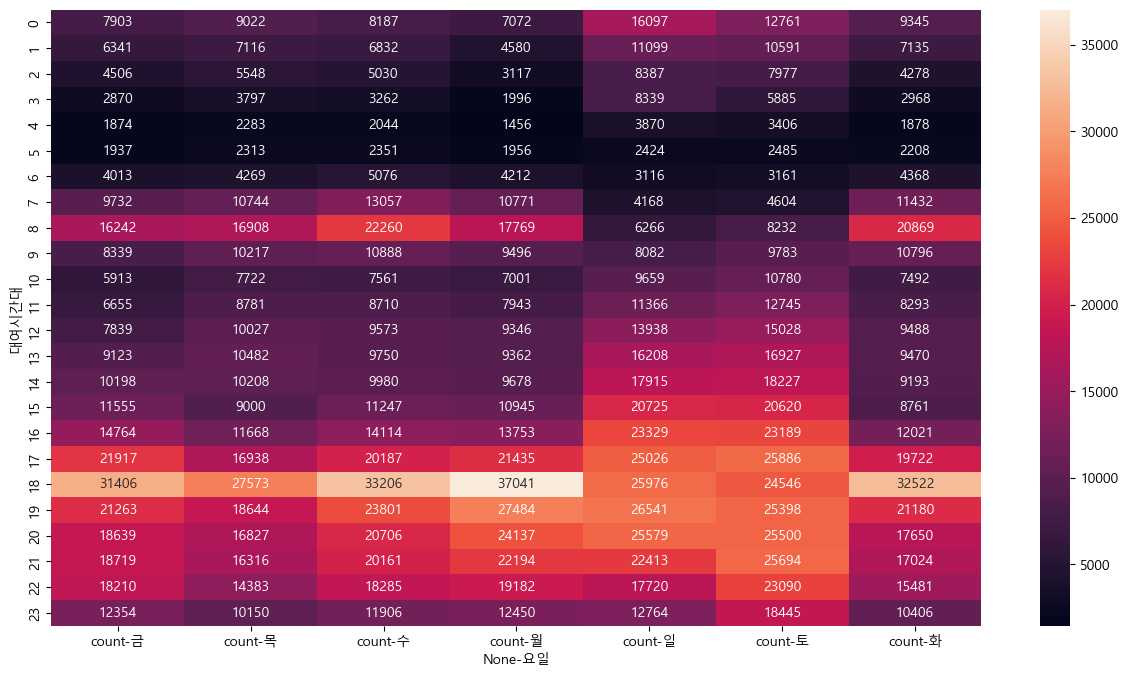

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data=hourly_dayofweek_ride,annot=True,fmt='d')

In [ ]:
bikes['요일'].value_counts()

요일
토    354960
일    341007
수    298174
월    294376
화    273980
금    272312
목    260936
Name: count, dtype: int64

In [ ]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '요일', '대여구', '대여점 위도', '대여점 경도',
       '대여시간대'],
      dtype='object')

<Axes: xlabel='요일', ylabel='count'>

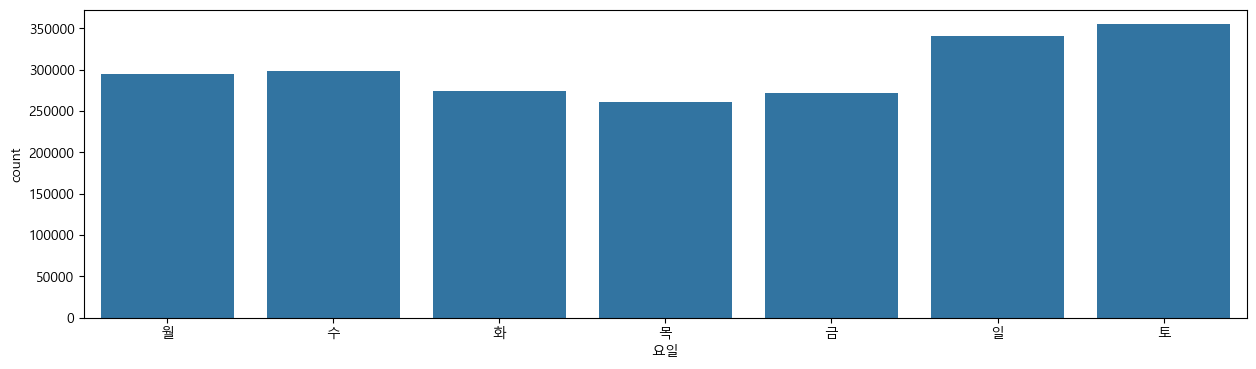

In [ ]:
# 요일별 이용건수 분석
import seaborn as sns

plt.figure(figsize=(15,4))
sns.countplot(data=bikes,x='요일')

<Axes: xlabel='일자', ylabel='count'>

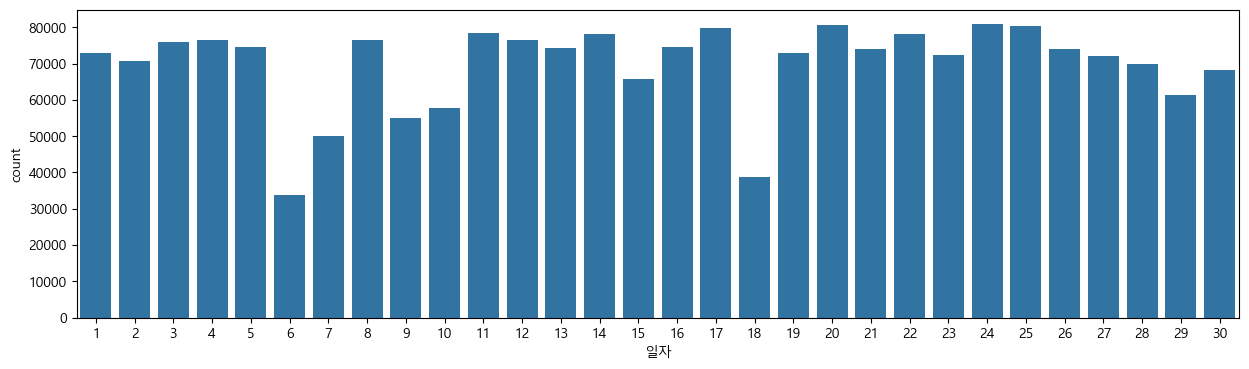

In [ ]:
# 일자별로 이용수 분석

# 1단계 ; '일자' 파생변수 생성
bikes['일자']=bikes['대여일시'].dt.day


# 2단계 : 일자별 이용수 시각화
plt.figure(figsize=(15,4))
sns.countplot(data=bikes,x='일자')


<Axes: xlabel='대여시간대', ylabel='count'>

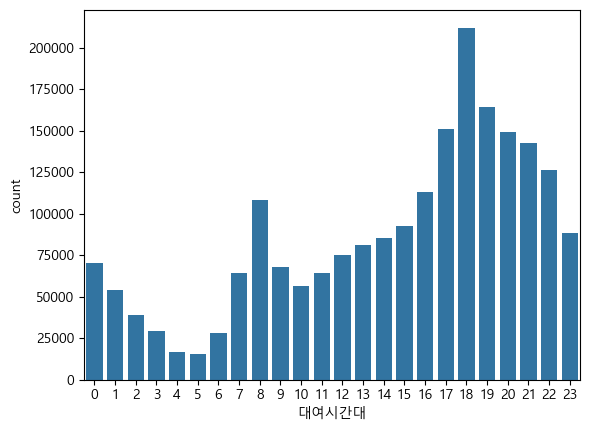

In [ ]:
sns.countplot(data=bikes,x='대여시간대')